In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
IBMQ.load_account()

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
matplotlib inline

In [4]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
simulator = my_provider.get_backend('ibmq_5_yorktown')

In [6]:
# Making the quantum circuit
def circuitI(gamma, beta, J, h1, h2):
    qc = QuantumCircuit(2, 2)
    qc.h([0, 1])
    qc.h(1)
    qc.cz(0,1)
    qc.rx(2*gamma*J, 1)
    qc.cz(0,1)
    qc.h(1)
    qc.i(0)
    qc.rz(2*gamma*h1, 0)
    qc.rz(2*gamma*h2, 1)
    qc.rx(2*beta, 0)
    qc.rx(2*beta, 1)
    qc.measure([0,1], [0,1])
    return qc

In [7]:
# Initializing the variables for C.
J = 0
h1 = -0.5
h2 = -0.5

#Setting the dimesions of the pasephase. The amount of simulated points = n**2
n = 61
p = np.pi/(n-1)
res = np.zeros([n, n, 4])


# Running a simulation for each point
for i in range(n):
    qc_list = []
    gamma = i*p
    for j in range(n):
        beta = j*p
        qc = circuitI(gamma, beta, J, h1, h2)       
        qc_list.append(qc)
    transpiled_circs = transpile(qc_list, backend=simulator)
    job = execute(transpiled_circs, backend = simulator, shots=1000 )
    for circ_index in range(len(transpiled_circs)):
        counts = job.result().get_counts(qc_list[circ_index])
        res[i][circ_index][:] = np.array([int(counts.get('00', 0)), int(counts.get('01', 0)), int(counts.get('10', 0)),
                            int(counts.get('11', 0))])


In [8]:
print(res)

[[[272. 234. 266. 228.]
  [256. 258. 267. 219.]
  [214. 244. 305. 237.]
  ...
  [230. 253. 290. 227.]
  [260. 234. 283. 223.]
  [258. 257. 244. 241.]]

 [[261. 240. 271. 228.]
  [259. 212. 254. 275.]
  [269. 223. 254. 254.]
  ...
  [246. 245. 251. 258.]
  [235. 231. 275. 259.]
  [268. 224. 245. 263.]]

 [[282. 225. 251. 242.]
  [251. 227. 258. 264.]
  [228. 206. 279. 287.]
  ...
  [263. 245. 259. 233.]
  [252. 204. 291. 253.]
  [295. 220. 222. 263.]]

 ...

 [[280. 245. 254. 221.]
  [212. 223. 268. 297.]
  [224. 203. 284. 289.]
  ...
  [259. 242. 240. 259.]
  [289. 195. 291. 225.]
  [301. 221. 247. 231.]]

 [[274. 234. 232. 260.]
  [256. 234. 245. 265.]
  [226. 219. 258. 297.]
  ...
  [273. 231. 260. 236.]
  [257. 230. 260. 253.]
  [299. 219. 254. 228.]]

 [[277. 220. 268. 235.]
  [284. 223. 214. 279.]
  [247. 236. 250. 267.]
  ...
  [272. 210. 259. 259.]
  [276. 208. 256. 260.]
  [267. 259. 239. 235.]]]


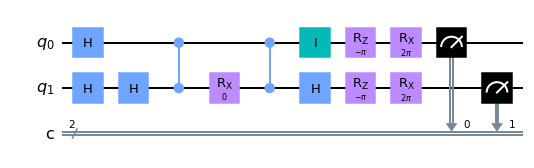

In [9]:
#Draw the current circuit
qc.draw(output='mpl')

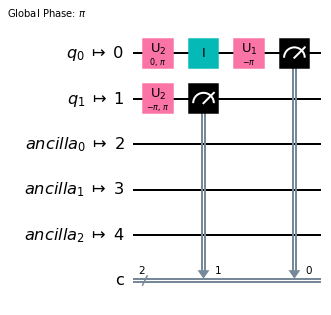

In [10]:
transpiled_circs[0].draw(output='mpl')

<AxesSubplot:>

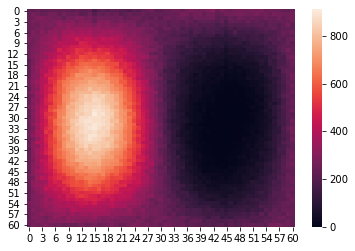

In [11]:
# Making a heatmap plot
sns.heatmap(res[:, :, 3])